# Assignment #10: Rectangular jigsaw placement

---


Karim Kanji  <br>
IA-20<br>
22.12.2023<br>

In [17]:
def rectangle_packing(K, Q, rectangles):
    # Verify if total area of rectangles equals the area of the large space
    total_area_rectangles = sum(w * h for w, h in rectangles)
    area_space = K * Q

    if total_area_rectangles != area_space:
        raise ValueError("Total area of rectangles does not match the area of the space.")

    # Function to check if a rectangle fits in a specific position
    def fits(position, rectangle, occupied):
        x, y = position
        w, h = rectangle
        # Check if the rectangle overflows the space
        if x + w > K or y + h > Q:
            return False
        # Check for overlap with already placed rectangles
        for i in range(y, y + h):
            for j in range(x, x + w):
                if occupied[i][j] != 0:
                    return False
        return True

    # Function to place a rectangle
    def place_rectangle(position, rectangle, occupied, index):
        x, y = position
        w, h = rectangle
        for i in range(y, y + h):
            for j in range(x, x + w):
                occupied[i][j] = index + 1

    # Backtracking algorithm to find a feasible arrangement
    def arrange_rectangles(rectangles, occupied, index=0):
        if index == len(rectangles):
            return True  # All rectangles have been placed

        for y in range(Q):
            for x in range(K):
                if fits((x, y), rectangles[index], occupied):
                    place_rectangle((x, y), rectangles[index], occupied, index)
                    if arrange_rectangles(rectangles, occupied, index + 1):
                        return True
                    # Backtrack
                    place_rectangle((x, y), rectangles[index], [[0 for _ in range(K)] for _ in range(Q)], index)
        return False

    # Initialize the occupied grid
    occupied = [[0 for _ in range(K)] for _ in range(Q)]

    # Find a feasible arrangement
    if arrange_rectangles(rectangles, occupied):
        return occupied
    else:
        return None

# Example usage:
K = 3  # Width of the large space
Q = 13  # Height of the large space
rectangles = [(2, 7), (1, 3), (1, 7), (3, 3), (2, 3)]  # Rectangles (width, height)

arrangement = rectangle_packing(K, Q, rectangles)
if arrangement:
    # Output the arrangement in a more readable format, illustrating each rectangle
    for row in arrangement:
        print("".join(str(x) if x > 0 else " " for x in row))
else:
    print("No valid arrangement found.")


112
112
112
113
113
113
113
553
553
553
444
444
444


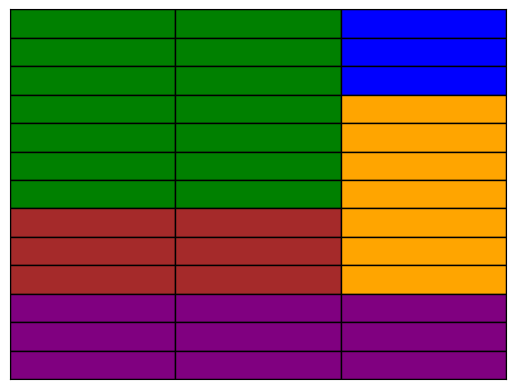

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_arrangement(K, Q, arrangement):
    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Set the limits of the plot to the size of the larger rectangle
    ax.set_xlim(0, K)
    ax.set_ylim(0, Q)

    # Invert the y-axis to have the origin (0,0) at the top-left corner
    ax.invert_yaxis()

    # Remove the axes for clarity
    ax.set_xticks([])
    ax.set_yticks([])

    # Color map for different rectangles
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

    # Go through each cell in the arrangement
    for y in range(Q):
        for x in range(K):
            index = arrangement[y][x]
            if index > 0:
                # Draw a rectangle with the corresponding color
                rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor=colors[index % len(colors)])
                ax.add_patch(rect)

    plt.show()

# Use the same arrangement as before
K = 3  # Width of the large space
Q = 13  # Height of the large space
rectangles = [(2, 7), (1, 3), (1, 7), (3, 3), (2, 3)]  # Rectangles (width, height)

arrangement = rectangle_packing(K, Q, rectangles)
if arrangement:
    visualize_arrangement(K, Q, arrangement)
else:
    print("No valid arrangement found.")
